# EMA study PR Curves

John Curtin

## Set up environment

In [ ]:
# handle conflicts
options(conflicts.policy = "depends.ok")

library(tidyverse, quietly = TRUE)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

## Open preds dfs

In [ ]:
preds_week<- read_rds(file.path(path_models, 
                               "outer_preds_1week_0_v5_nested_main.rds"))
preds_day<- read_rds(file.path(path_models, 
                              "outer_preds_1day_0_v5_nested_main.rds"))
preds_hour<- read_rds(file.path(path_models, 
                               "outer_preds_1hour_0_v5_nested_main.rds"))


## Generate PR curves

In [ ]:
pr_week <- preds_week |> 
  yardstick::pr_curve(prob_beta, truth = label) |> 
  mutate(model = "1week")

pr_day <- preds_day |> 
  yardstick::pr_curve(prob_beta, truth = label) |> 
  mutate(model = "1day")

pr_hour <- preds_hour|> 
  yardstick::pr_curve(prob_beta, truth = label) |> 
  mutate(model = "1hour")

pr_all <- pr_week |> 
  bind_rows(pr_day) |> 
  bind_rows(pr_hour) |> 
  mutate(thres_avg = round(.threshold, 3)) |> 
  group_by(model, thres_avg) |> 
  reframe(recall = mean(recall), precision =  mean(precision)) |> 
  mutate(model = factor(model, levels = c("1week", "1day", "1hour"),
                        labels = c("week", "day", "hour")))


### Plot PR Curve

ℹ Please use `linewidth` instead.

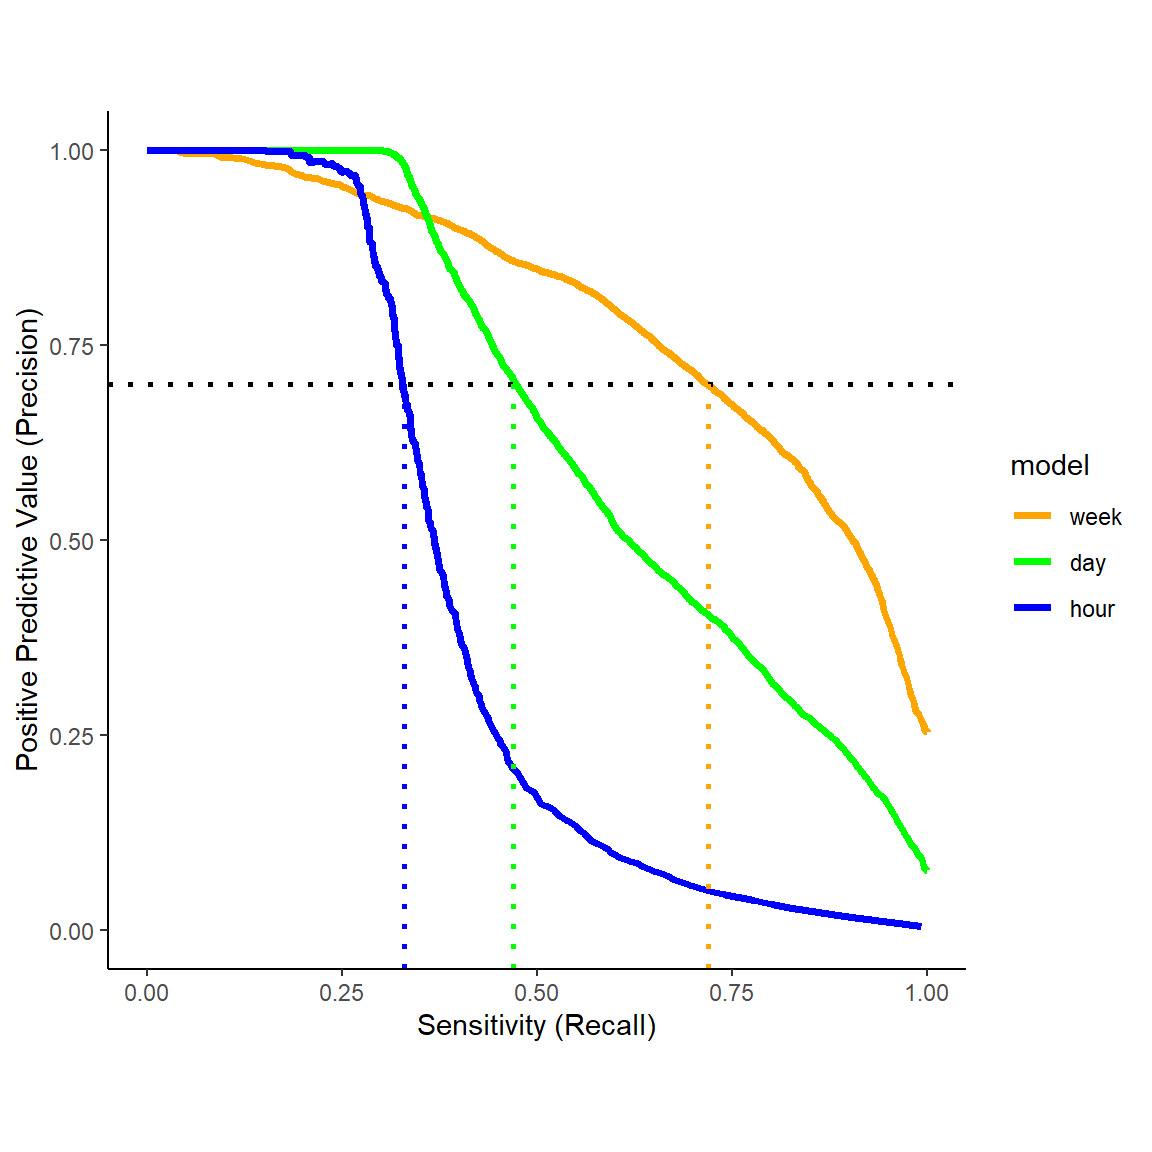

In [ ]:

pr_all |>
  ggplot(aes(x = recall, y = precision, color = model)) +
  geom_path(size = 1.25) +
  coord_fixed(xlim = c(0, 1), ylim = c(0, 1)) +
  labs(x = "Sensitivity (Recall)",
       y = "Positive Predictive Value (Precision)") +
  scale_color_manual(values = c("orange","green","blue")) +
  geom_hline(yintercept = .70, color = "black", size = 1, linetype = "dotted") +
  geom_segment(x = .72, y = -.05 , xend = .72, yend = .70,
               color = "orange", size = 1, linetype = "dotted") +
  geom_segment(x = .47, y = -.05 , xend = .47, yend = .70,
               color = "green", size = 1, linetype = "dotted") +
  geom_segment(x = .33, y = -.05 , xend = .33, yend = .70,
               color = "blue", size = 1, linetype = "dotted")
